1. Import required packages.
2. Load the data file
3. Select only the following columns from the dataset: 'PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE'.

3 pts.

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
listings = pd.read_csv(io.BytesIO(uploaded['Newton.csv']))

Saving Newton.csv to Newton.csv


4. Check for missing values using a heatmap.
5. Check data distribution by property type using a histogram (bar graph).
6. Exclude records if appropriate.




In [ ]:
listings=listings[['PROPERTY TYPE','PRICE','BEDS','BATHS','SQUARE FEET','LOT SIZE']]

7. Build a pairplot to evaluate data distributions and correlations.
8. Comment whether the predictors: 1) have a linear relationship with the target (Price), 2) display constant variance (homoscedasticity), 3) contain outliers that need to be excluded.


<Axes: >

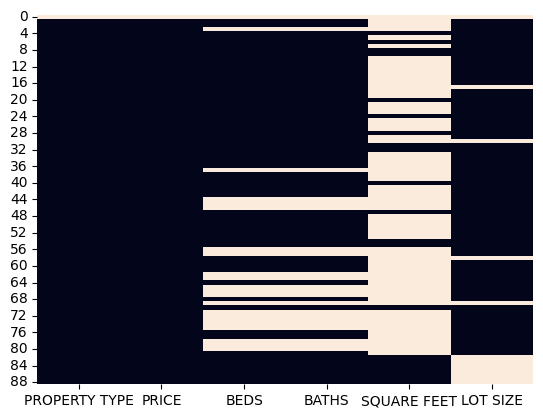

In [ ]:
#checking Data for Missing Values using a Heatmap
sns.heatmap(listings.isnull(), cbar=False)

<Axes: >

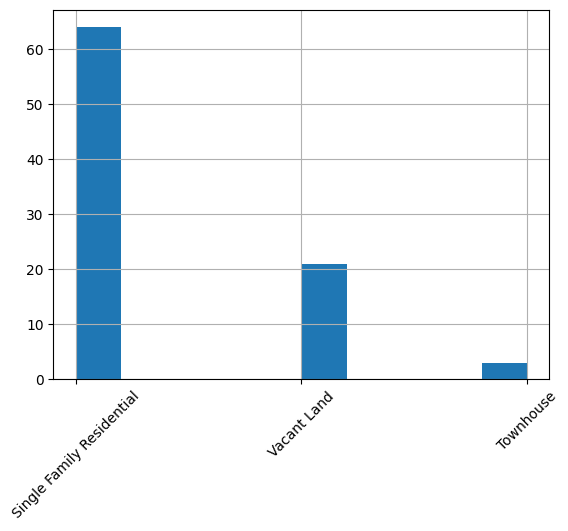

In [ ]:
#Checking Data Disturbition by Property type using a Histogram
listings['PROPERTY TYPE'].hist(xrot=45.0)

In [ ]:
#Checking unique records
listings['PROPERTY TYPE'].unique()

array([nan, 'Single Family Residential', 'Vacant Land', 'Townhouse'],
      dtype=object)

In [ ]:
property_types_to_remove = ['Vacant Land', 'Townhouse']

listings.drop(listings[listings['PROPERTY TYPE'].isin(property_types_to_remove)].index, inplace=True)

9. Remove outliers if necessary.
10. Impute missing values as appropriate.




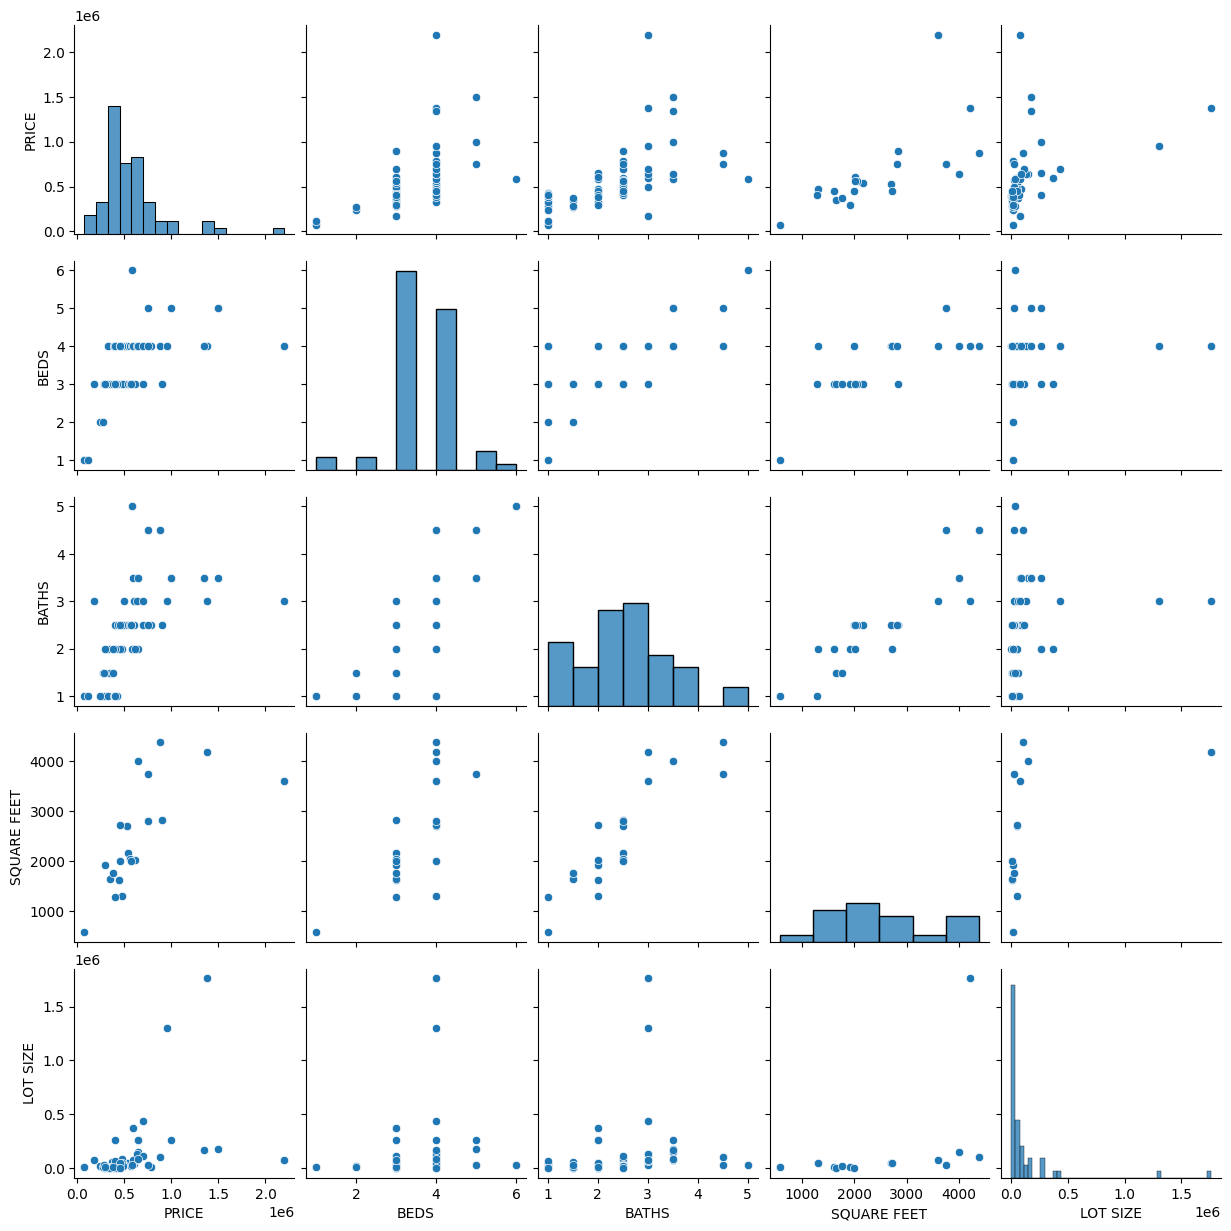

In [ ]:
#Building a pairplot to evaluate data distributions and correlations
sns.pairplot(listings)
# Price and Square Feet : There is a a linear relationship between the Square Feet and the Price. The trend shows as the beds increases, so does the price. Price is getting higher when the properties are getting bigger.
# We observe Homoscedasticity between Price and Square Feet because variance seems more constanst in here.
# We have some outliers for Lot Size. There are several points where the Price is much higher relative to the main cluster of data at low lot sizes, and some points with very large lot sizes have either very low or very high prices.

11. Split data 70/30 into training and test datasets.
12. Build a multiple linear regression model to predict Price.
13. Report R2, MAE, Max error, RMSE.
14. Comment on whether the model performance would be acceptable for practitioners.


In [ ]:
listings.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE
count,6.400000e+01,64.000000,64.000000,21.000000,5.600000e+01
mean,5.661758e+05,3.437500,2.312500,2445.761905,1.244473e+05
std,3.391526e+05,0.833333,0.910695,1041.950282,2.915002e+05
min,7.490000e+04,1.000000,1.000000,576.000000,2.222000e+03
25%,3.837250e+05,3.000000,1.875000,1764.000000,1.682500e+04
50%,4.774500e+05,3.000000,2.500000,2047.000000,3.615450e+04
75%,6.362250e+05,4.000000,3.000000,2829.000000,8.820900e+04
max,2.200000e+06,6.000000,5.000000,4384.000000,1.761566e+06


In [ ]:
#Removing outliers
listings.drop(listings[listings['LOT SIZE']>1000000].index, inplace=True)

In [ ]:
#Imputing Missing Values
# Fill missing values only for numeric columns
imputed = listings.fillna(listings.select_dtypes(include=['number']).mean())
imputed.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE
count,6.300000e+01,63.000000,63.000000,63.00000,63.000000
mean,5.469396e+05,3.419355,2.290323,2358.05000,72291.314815
std,3.218416e+05,0.833732,0.909397,545.98223,85729.628381
min,7.490000e+04,1.000000,1.000000,576.00000,2222.000000
25%,3.824500e+05,3.000000,1.750000,2358.05000,17641.500000
50%,4.749000e+05,3.000000,2.290323,2358.05000,43995.000000
75%,6.044995e+05,4.000000,2.500000,2358.05000,73824.657407
max,2.200000e+06,6.000000,5.000000,4384.00000,435600.000000


In [ ]:
predictors = ['PROPERTY TYPE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE']

In [ ]:
X = pd.get_dummies(imputed[predictors], drop_first=True)
y = imputed['PRICE']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
re_prices = LinearRegression()

re_prices.fit(train_X, train_y)

LinearRegression()

In [ ]:
X.columns

Index(['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE'], dtype='object')

In [ ]:
re_prices.intercept_

-369671.21249778406

In [ ]:
re_prices.coef_

array([1.01887286e+05, 7.53349354e+04, 1.51248210e+02, 8.34551368e-01])

In [ ]:
train_X.head()

,BEDS,BATHS,SQUARE FEET,LOT SIZE
11,4.0,3.0,2358.05,30840.000000
81,3.0,3.0,2358.05,75358.000000
21,3.0,2.5,2358.05,27168.000000
39,4.0,2.0,2358.05,261360.000000
85,3.0,2.5,2170.00,72291.314815


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score, explained_variance_score
import math

In [ ]:
pred_y = re_prices.predict(valid_X)

In [ ]:
print('Regression model performance evaluation')
print('R2: ', r2_score(valid_y, pred_y))
print('MAE: ', mean_absolute_error(valid_y, pred_y))
print('RMSE: ', math.sqrt(mean_squared_error(valid_y, pred_y)))
print('Max error: ', max_error(valid_y, pred_y))

Regression model performance evaluation
R2:  0.3699786909837265
MAE:  117452.80843279486
RMSE:  137813.64531906438
Max error:  321399.5198812203


An R² of 0.370 means that 37.0% of the variance in price is explained by model. In this case R² is very low and in many cases 70.0% or higher is often acceptable. 37.0% signicifant amount of variability still unexplanied. So, it is not reliable for decision-making.
Mean Absolute Error(MAE) and the RMSE can be acceptable for High-End markets but not with lower propert values. The errors might be too large and model can be seen unreliable.
